In [71]:
#%%
import pydicom
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# TASK: In the same folder as this .py file you will find a DICOM folder
# with a volume in it. You can assume that all files belong to the same series.
# Your task is to visualize any three slices across the three 
# cardinal planes from this volume: Axial, Coronal and Sagittal. You can visualize 
# by saving them as png, similar to the previous exercise. You can visualize slice at 
# any level, but I suggest that you visualize slices located in the middle of the volume.



# 
# Bonus points: 
# 1) What is the modality that you are dealing with here?
# 2) Try to figure out which axis corresponds to what plane by searching online.
# You should have a good guess of what anatomy you are looking at if you visualize the middle slice
# 3) Try plotting the slices in non-primary planes with proper aspect ratio
#
# Hints:
# - You may want to rescale the output because your voxels are non-square. 
# - Don't forget that you need to order your slices properly. Filename 
# may not be the best indicator of the slice order. 
# If you're confused, try looking up the first value of ImagePositionPatient
# - Don't forget the windowing. A good initial guess would be scaling all
# image values down to [0..1] range when saving. Pillow deals with such well

# %% 
# Load the volume into array of slices
path = f"volume"
slices = [pydicom.dcmread(os.path.join(path, f)) for f in os.listdir(path)]
slices = sorted(slices, key = lambda dcm: dcm.ImagePositionPatient[0]) # sorting the slices by IPP

In [53]:
image_data = np.stack([s.pixel_array for s in slices])

In [55]:
image_data.shape

(24, 320, 260)

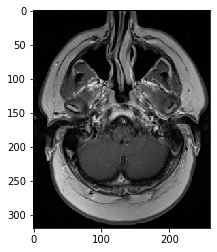

In [58]:
img = image_data[20,:,:]
plt.imshow(img,cmap = "gray")
# Save using full-range window
im = Image.fromarray((img/np.max(img)*0xff).astype(np.uint8), mode="L")
im.save("axial.png")

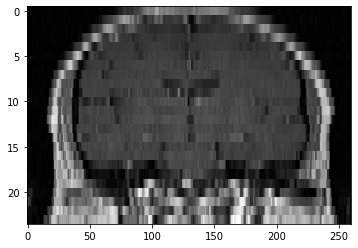

In [64]:
img = image_data[:,160,:]
aspect_ratio = slices[0].SliceThickness/slices[0].PixelSpacing[0]
plt.imshow(img,cmap = "gray", aspect = aspect_ratio)
im = Image.fromarray((img/np.max(img)*0xff).astype(np.uint8), mode="L")
im = im.resize((img.shape[1], int(img.shape[0] * aspect_ratio)))
im.save("coronal.png")

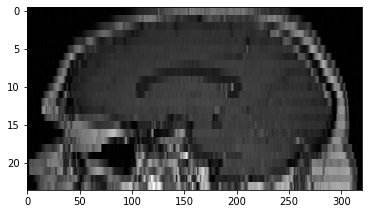

In [60]:
img = image_data[:,:,150]
aspect_ratio = slices[0].SliceThickness/slices[0].PixelSpacing[0]
plt.imshow(img,cmap = "gray", aspect = aspect_ratio)
im = Image.fromarray((img/np.max(img)*0xff).astype(np.uint8), mode="L")
im = im.resize((img.shape[1], int(img.shape[0] * aspect_ratio)))
im.save("sagittal.png")

# Bonus

In [38]:
# 1) What is the modality that you are dealing with here?
slices[0].Modality

'MR'

In [45]:
# What are the dimensions?
print(f"{len(slices)} of size {slices[0].Rows}x{slices[0].Columns}")

24 of size 320x260
